In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob as glob
import scipy.misc


In [2]:
example_grid = "../calibration_images/example_grid1.jpg"

grid_img = cv2.imread(example_grid)

gray = cv2.cvtColor(grid_img,cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (7,7), 0)

edges = cv2.Canny(blurred, 30, 50)


for j in range (edges.shape[0]):
    for i in range (edges.shape[1]):
        if j <90:
            edges[j,i]=0

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, minLineLength=100, maxLineGap=50)

gg = np.zeros_like(edges, dtype=None, shape=None)

outputlines =np.empty_like (lines)

output = []
i = 0

for line in lines:
    if line[0][0] == -1:
            continue 
    for sline in lines:
        if sline[0][0] == -1:
            continue 
        if (True):
            c = 0
            for k in range (4):
                if ( abs (line[0][k] - sline[0][k])  < 15) :
                    c+=1 
            e=0
            for k in range (4):
                if ( abs (line[0][k] - sline[0][k])  ==0) :
                    e+=1 

            if (c==4 and e!=4 ):
                line[0][0] = -1
fourlines = []

for line in lines:
    if (line[0][0]!=-1):
        fourlines.append(line[0])

out = []

for i in range (4):

    gg = np.zeros_like(edges, dtype=None, shape=None)

    x1, y1, x2, y2 = fourlines[i]

    cv2.line(gg, (x1, y1), (x2, y2), 50, 1)

    out.append(gg)



In [3]:
def neb (point):
    x= point[0]
    y = point[1]
    outnebs = np.ndarray(shape=(0,2))
    for j in range(-1,2):
        for i in range(-1,2):
            outnebs = np.append(outnebs, np.array([[x+j,x+i]]), axis=0)
    return outnebs

196 97
197 97
107 99
107 99
108 99
108 99
5 142
5 142
5 142
6 142
6 142
6 142
301 142
302 142


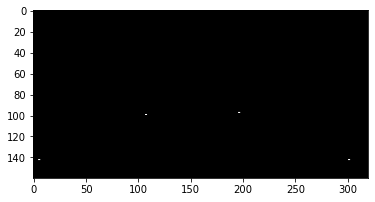

In [4]:
points = np.ndarray(shape=(0,2))

for j in range (out[0].shape[0]):
    for i in range (out[0].shape[1]):
        for k in range (1,4):
            out[0][j][i] += out[k][j][i]

            if (out[0][j][i]>80):
                print(i,j)
                ##if ( not (neb([i,j]).any() in points )):
                  ##      points = np.append(points, ([[i,j]]), axis=0)


out[0][out[0] <=50] = 0

plt.imshow(out[0],cmap='gray')